In [1]:
# Importing Tensorflow
import tensorflow as tf

In [2]:
# To check the 'Tensorflow version'
tf.__version__

'1.9.0'

# INDEX
---
### 1. [Tensorflow Constants](#Tensorflow-Constants)
### 2. [Tensorflow Graphs](#Tensorflow-Graphs)
### 3. [Tensorflow Variables](#Tensorflow-Variables)
### 4. [Tensorflow Placeholders](#Tensorflow-Placeholders)
---

## Tensorflow Constants

In [3]:
number = tf.constant(10)
hello = tf.constant('Hello ')

In [4]:
#Printing doesn't work the usual way...
print(number)

Tensor("Const:0", shape=(), dtype=int32)


In [5]:
number

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [6]:
# You can also see that Tensorflow keeps track of the operations by giving each operation some sort of node number
number + number

<tf.Tensor 'add:0' shape=() dtype=int32>

In [7]:
number + number

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [8]:
number + number

<tf.Tensor 'add_2:0' shape=() dtype=int32>

Notice the way Tensorflow gave numbering to the 'add' operation above.

In [9]:
world = tf.constant('World')

In [10]:
#Notice the type of the varibale 'world' it is a "Tensor" and not a "String"
type(world)

tensorflow.python.framework.ops.Tensor

### **Tensorflow Session**

In [11]:
#You need to put all the variables within a session and run the session to actually execute the graph (or) node(s)
with tf.Session() as sess:
    print(sess.run(hello + world)) # Perform concatenation and print the result

b'Hello World'


Note that the **'b'** that's present as a prefix before the concatenated result suggests that the result is a 'bytes literal'.

In [12]:
# You can also use the alternative way to 'create' the session (Applicable only in Jupter notebook!!!)
inter_sess = tf.InteractiveSession()

In [13]:
inter_sess.run(number)

10

In [14]:
print(inter_sess.run(number + number))

20


### **.eval( ) method**

In [15]:
# You can also use the below mentioned syntax to 'run' the session
number.eval()

10

In [16]:
print(number.eval())

10


### Various ways to create Tensors

In [17]:
# Create a constant
const = tf.constant(0)

# Create a matrix of some shape and fill it with a constant
fill_mat = tf.fill((3, 3), 25)

# Create a matrix having numbers taken from a random uniform distribution
uni_mat = tf.random_uniform((3, 3), minval=0, maxval=10)

# Create a matrix having numbers taken from a random normal distribution
norm_mat = tf.random_normal((3, 3), mean=0, stddev=1)

# Create a matrix of zeros
zeros_mat = tf.zeros((3, 3))

# Create a matrix of ones
ones_mat = tf.ones((3, 3))

In [18]:
# Create a list of all the Tensors that you want to execute to get the result
ops = [const, fill_mat, uni_mat, norm_mat, zeros_mat, ones_mat]

In [19]:
with tf.Session() as sess:
    index = 1
    for op in ops:
        print('Operation %d'% index)
        print('------------')
        print(sess.run(op))
        print('\n')
        index += 1

Operation 1
------------
0


Operation 2
------------
[[25 25 25]
 [25 25 25]
 [25 25 25]]


Operation 3
------------
[[7.0430183 3.361591  1.629138 ]
 [6.9174266 5.190362  8.993379 ]
 [9.096693  0.9799087 1.1955678]]


Operation 4
------------
[[ 0.5255748  -0.24397083 -1.45015   ]
 [ 1.428512    0.5556668   0.21383384]
 [ 0.8047397   0.8654419  -0.18876682]]


Operation 5
------------
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Operation 6
------------
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]




In [20]:
#Get the shape of a Tensor
print(uni_mat.get_shape())

(3, 3)


## Tensorflow Graphs

Generally, graphs are the ones that Tensorflow uses in the background. Also, each node in a graph is an 'operation' with possible inputs that can supply some sort of output.

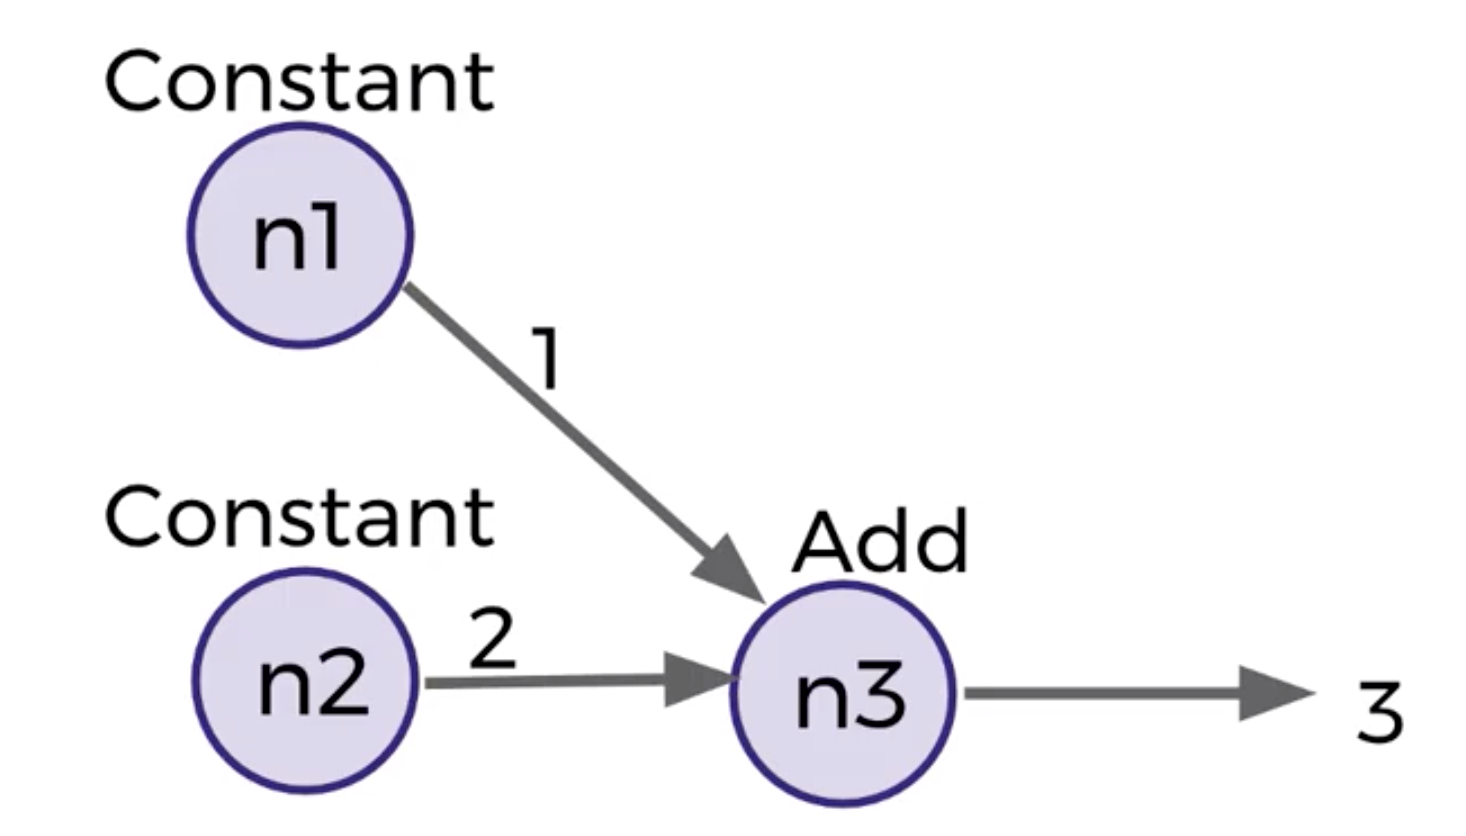

Let's start by constructing a simple graph as the one shown above

In [21]:
n1 = tf.constant(1)
n2 = tf.constant(2)

n3 = tf.add(n1, n2) # You can also use n3 = n1 + n2

In [22]:
with tf.Session() as sess:
    print("The sum is: ", sess.run(n3))

The sum is:  3


### **Default Graph**

By default, Tensorflow creates a default graph. We can also create our own graphs and make them default too!

In [23]:
#Get the location of the current (or) the default graph that Tensorflow has created
print(tf.get_default_graph())

In [24]:
#Now, create a new graph
g1 = tf.Graph()

### **User created graph**

In [25]:
#Get the location of the newly created graph
print(g1)

In [26]:
#So, to set the newly created graph as the default graph use the below syntax
with g1.as_default():
    print(g1 is tf.get_default_graph())

True


! Beware as the 'new graph' we just set as default acts as a 'default graph only within the above "with" statement'.

In [27]:
print(g1 is tf.get_default_graph())

False


## Tensorflow Variables

**Some important points regarding variables:-**
1. MUST be initialized during creation.
2. Tensorflow *tunes* these variables during the optimization process. Therefore, weights and biases are stored in these variables as they need to be tuned.

In [28]:
#Create a tensor so that we can pass this to our variable later
my_tensor = tf.random_uniform((4, 4), 0, 1)

my_var = tf.Variable(initial_value=my_tensor)
#inter_sess.run(my_var)   # This line throws an error because, we need to initialize the variables before we can run them

init = tf.global_variables_initializer()


inter_sess.run(init)

In [29]:
inter_sess.run(my_var)   # No error is generated

array([[0.73869467, 0.63462377, 0.1972481 , 0.67704296],
       [0.59892535, 0.9628223 , 0.27034736, 0.4309311 ],
       [0.04811096, 0.36112833, 0.35498655, 0.16799152],
       [0.05751681, 0.04600096, 0.07804799, 0.9132217 ]], dtype=float32)

## Tensorflow Placeholders

**Some important points regarding variables:-**
1. Initially EMPTY.
2. Used to feed in actual training samples i.e.; in the form of batches, etc.;.
3. Requires the 'Data type' (Compulsory) and 'Shape' (Optional) of the data being fed.

In [30]:
ph = tf.placeholder(tf.float32)   # We can also use another argument i.e.; shape=(None, 5); where 'None' signifies that we do not know how many samples we are dealing with